<a href="https://colab.research.google.com/github/SarithaSundaresan/WineQuality/blob/main/Wine_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data set
# train data set
train_ds_org = pd.read_csv('/content/sample_data/train.csv')
train_ds = train_ds_org.drop('Id', axis = 1)
x_train = train_ds.drop('quality', axis = 1)
y_train = train_ds['quality']

# test data set
x_test = pd.read_csv('/content/sample_data/test.csv')
x_test = x_test.drop('Id', axis = 1)
#y_test = pd.read_csv('/content/sample_data/sample_submission.csv')
#y_test = y_test.drop('Id', axis = 1)


In [ ]:
from sklearn.metrics.pairwise import normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_train = scaler.fit_transform(x_train)
ntrain = pd.DataFrame(normalized_train, columns = x_train.columns)
print(ntrain.head())

normalized_test = scaler.fit_transform(x_test)
ntest = pd.DataFrame(normalized_test, columns = x_test.columns)
print(ntest.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.275229          0.228571     0.513158        0.078125   0.151741   
1       0.394495          0.085714     0.960526        0.085938   0.199005   
2       0.192661          0.235714     0.039474        0.070312   0.116915   
3       0.284404          0.492857     0.289474        0.109375   0.179104   
4       0.321101          0.128571     0.394737        0.085938   0.166667   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.432836              0.113475  0.414831  0.567308   0.243590   
1             0.432836              0.212766  0.621880  0.557692   0.179487   
2             0.029851              0.017730  0.479442  0.750000   0.217949   
3             0.149254              0.205674  0.530837  0.442308   0.089744   
4             0.134328              0.134752  0.320852  0.442308   0.621795   

    alcohol  
0  0.641509  
1  0.773585  
2  0.490566  


In [ ]:
train_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [ ]:
x_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [ ]:
#y_test.head()

In [ ]:
# Shape of data sets
print(f"Shape of train data set is {train_ds.shape}")
print(f"Shape of test data set is {x_test.shape}")

Shape of train data set is (2056, 12)
Shape of test data set is (1372, 11)


In [ ]:
# Missing data
train_ds.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

### Distribution of each feature
fig = plt.figure(figsize = [20,10])
col = train_ds_org.columns
#print(col)
fig, axs = plt.subplots(4, 3, figsize=(20, 10))

sns.histplot(x = 'fixed acidity', data = train_ds_org, ax = axs[0,0])
sns.histplot(x = 'volatile acidity', data = train_ds_org, ax = axs[0,1])
sns.histplot(x = 'citric acid', data = train_ds_org, ax = axs[0,2])
sns.histplot(x = 'residual sugar', data = train_ds_org,  ax = axs[1,0])
sns.histplot(x = 'chlorides', data = train_ds_org,  ax = axs[1,1])
sns.histplot(x = 'free sulfur dioxide', data = train_ds_org,  ax = axs[1,2])
sns.histplot(x = 'total sulfur dioxide', data = train_ds_org,  ax = axs[2,0])
sns.histplot(x = 'density', data = train_ds_org,  ax = axs[2,1])
sns.histplot(x = 'pH', data = train_ds_org,  ax = axs[2,2])
sns.histplot(x = 'sulphates', data = train_ds_org,  ax = axs[3,0])
sns.histplot(x = 'alcohol', data = train_ds_org,  ax = axs[3,1])
sns.histplot(x = 'quality', data = train_ds_org,  ax = axs[3,2])

axs[0, 0].set(ylabel='')
axs[0, 1].set(ylabel='')
axs[0, 2].set(ylabel='')
axs[1, 0].set(ylabel='')
axs[1, 1].set(ylabel='')
axs[1, 2].set(ylabel='')
axs[2, 0].set(ylabel='')
axs[2, 1].set(ylabel='')
axs[2, 2].set(ylabel='')
axs[3, 0].set(ylabel='')
axs[3, 1].set(ylabel='')
axs[3, 2].set(ylabel='')

fig.suptitle('Histogram for all numeric variables')
plt.tight_layout()
plt.show()

<Axes: >

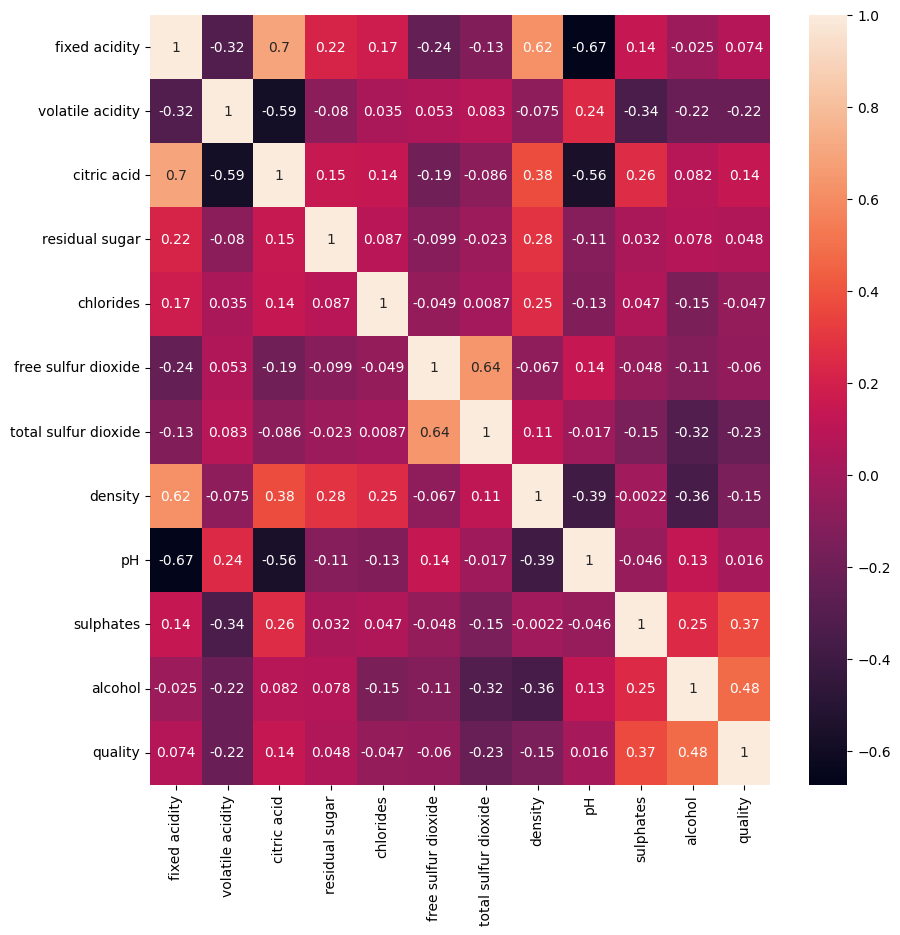

In [ ]:
# Correlation
plt.figure(figsize=(10,10))
sns.heatmap(train_ds.corr(),annot=True)


In [ ]:
# Outliers

col_name = train_ds.columns.tolist()
col_name

# for i in range(len(col_name)):
#     plt.boxplot(train_ds[col_name[i]])
#     plt.show()



['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:



#g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None)

In [ ]:
# Training and testing using Logistic regression
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(x_test)

# Calculate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Training and testing using Logistic regression
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(ntrain, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(ntest)

# Calculate the accuracy of the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Training and testing using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_fit = clf.fit(x_train,y_train)
clf_pred = clf_fit.predict(x_test)
#clf_scr = round(accuracy_score(y_test,clf_pred),2)*100
#print('Accuracy =',clf_scr,'%')
#print('\nConfussion matrix:')
#print(CM(y_test, clf_pred))

In [ ]:
# Training and testing using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_fit = clf.fit(ntrain,y_train)
clf_pred = clf_fit.predict(ntest)
#clf_scr = round(accuracy_score(y_test,clf_pred),2)*100
#print('Accuracy =',clf_scr,'%')
#print('\nConfussion matrix:')
#print(CM(y_test, clf_pred))